How many runs would you like to simulate:  10000
What is the probability that a given student is immune (0 - .99):  0



Expected number of infected individuals per day:

Day
1     1.00
2     1.60
3     2.18
4     2.09
5     2.76
6     3.33
7     3.89
8     4.32
9     5.01
10    5.46
11    5.90
12    6.19
13    6.38
14    6.35
15    6.19
16    5.92
17    5.53
18    5.08
19    4.59
20    4.09
21    3.60
22    3.16
23    2.72
24    2.34
25    1.99
26    1.71
27    1.44
28    1.21
29    1.01
30    0.85
31    0.71
32    0.60
33    0.49
34    0.41
35    0.34
36    0.28
37    0.23
38    0.19
39    0.16
40    0.13
41    0.10
42    0.08
43    0.07
44    0.06
45    0.04
46    0.04
47    0.03
48    0.02
49    0.02
50    0.02
51    0.01
52    0.01
53    0.01
54    0.01
55    0.01
56    0.00
57    0.00
58    0.00
59    0.00
60    0.00


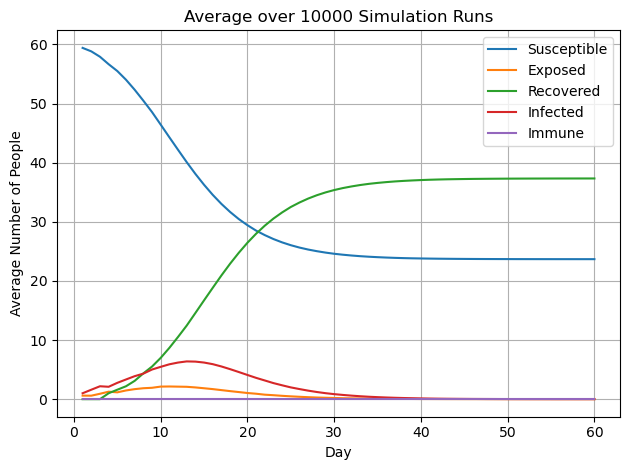


Final Day Stats per Run:
         Susceptible       Exposed     Recovered      Infected   Immune
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0
mean      23.674800      0.000700     37.323000      0.001500      0.0
std       18.343077      0.033161     18.342604      0.053833      0.0
min        1.000000      0.000000      1.000000      0.000000      0.0
25%       11.000000      0.000000     33.000000      0.000000      0.0
50%       16.000000      0.000000     45.000000      0.000000      0.0
75%       28.000000      0.000000     50.000000      0.000000      0.0
max       60.000000      2.000000     60.000000      3.000000      0.0


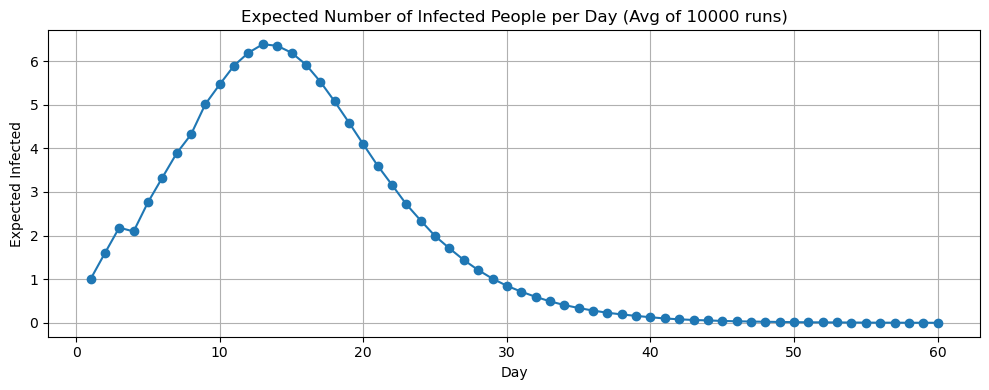

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(2579)

# Ask user how many runs to simulate and the probability that a student is immune
# Additional critera could be added to this section with minor edits to control variables such as population size, the number initially infected,
# the infection rate, ect.
prubimmune = 0
try:
    runs = input("How many runs would you like to simulate: ")
    runs = int(runs)
    probimmune = input("What is the probability that a given student is immune (0 - .99): ")
    probimmune = float(probimmune)
except Exception as e:
    print(f"Incorrect input, and error has occured: {e}")

# Number of days in each simulation
num_days = 60

# Store data from all runs
runsdata = []

# Run the simulation 'runs' times
for run in range(runs):
    # Initial conditions for each run
    p = 0.01
    inf = 1
    result = np.random.binomial(1, p=probimmune, size=60)
    imu = sum(result)
    sus = 60 - imu
    exp = 0
    rec = 0
    flu1 = 1
    flu2 = 0
    flu3 = 0
    flu4 = 0
    dflist = []

    #loops for each day in the simulation, flu1-4 represent all four days of exposure, day 1; exposed, days 2-4; contagious.
    for day in range(num_days):
        outcome = np.random.binomial(n=inf, p=p, size=sus)
        exp = sum(outcome)
        sus = sus - exp
        inf = flu1 + flu2 + flu3
        flu4 = flu3
        flu3 = flu2
        flu2 = flu1
        flu1 = exp
        rdata = {
            'Run': run + 1,
            'Day': day + 1,
            'Susceptible': sus,
            'Exposed': exp,
            'Recovered': rec,
            'Infected': inf,
            'Immune': imu
        }
        dflist.append(rdata)
        rec = rec + flu4
    
    # Add data from current run to list
    runsdata.extend(dflist)

# Convert full results to DataFrame
df_allruns = pd.DataFrame(runsdata)

# Group by day across all runs and take average
df_mean = df_allruns.groupby('Day')[['Susceptible', 'Exposed', 'Recovered', 'Infected', 'Immune']].mean()
# Print expected number infected for each day
print("\nExpected number of infected individuals per day:\n")
print(df_mean['Infected'].round(2).to_string())
# Plot the average trend over time
df_mean.plot(title=f"Average over {runs} Simulation Runs")
plt.ylabel("Average Number of People")
plt.xlabel("Day")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display run statistics
final_day_stats = df_allruns[df_allruns['Day'] == num_days].groupby('Run')[['Susceptible', 'Exposed', 'Recovered', 'Infected', 'Immune']].mean()
print("\nFinal Day Stats per Run:\n", final_day_stats.describe())

plt.figure(figsize=(10, 4))
plt.plot(df_mean.index, df_mean['Infected'], marker='o', label='Expected Infected')
plt.title(f"Expected Number of Infected People per Day (Avg of {runs} runs)")
plt.xlabel("Day")
plt.ylabel("Expected Infected")
plt.grid(True)
plt.tight_layout()
plt.show()